In [ ]:
#importing packages

import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#uplod and read data
#data: https://docs.google.com/spreadsheets/d/1WNgShvGuI5PIihlPaoCRWgOYvXe1_waP/edit?usp=sharing&ouid=106270509719034320581&rtpof=true&sd=true
df = pd.read_excel('/content/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
#Performing exploratory data analysis

#Finding the number of null values in the dataframe i.e. checking for missing values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#dropping the null values. Specifically dropping the rows with null values in CustomerID colum
df_dropped_subset = df.dropna(subset=['CustomerID'])
df_dropped_subset.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
#Getting summary statistics
df_dropped_subset.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [ ]:
#dropping values with negatives in Quantity Column or rather only keeping the ones which are greater than zero
df_preprocessed = df_dropped_subset[df_dropped_subset['Quantity'] > 0]
df_preprocessed.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


In [ ]:
#creating total price column
df_preprocessed['TotalPrice']=df_preprocessed['Quantity']*df_preprocessed['UnitPrice']
df_preprocessed.head()

<ipython-input-12-f80c857788b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed['TotalPrice']=df_preprocessed['Quantity']*df_preprocessed['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
#Convert the column to datetime format
df_preprocessed['InvoiceDate'] = pd.to_datetime(df_preprocessed['InvoiceDate'])

#Summary of Dataframe
df_preprocessed.info()

#Create a new column for the invoice month
df_preprocessed['InvoiceMonth'] = df_preprocessed['InvoiceDate'].dt.to_period('M').astype(str)
df_preprocessed.head()

<ipython-input-13-0db487e9b1a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed['InvoiceDate'] = pd.to_datetime(df_preprocessed['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


<ipython-input-13-0db487e9b1a6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed['InvoiceMonth'] = df_preprocessed['InvoiceDate'].dt.to_period('M').astype(str)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [ ]:
#creating total price per customer column
df_preprocessed['TotalPricePerCustomer'] = df_preprocessed.groupby(['CustomerID','InvoiceMonth'])['TotalPrice'].transform('sum')
df_preprocessed.head()

#I strongly feel like there might be a semantic error here.

<ipython-input-14-e1a4407904a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed['TotalPricePerCustomer'] = df_preprocessed.groupby(['CustomerID','InvoiceMonth'])['TotalPrice'].transform('sum')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,TotalPricePerCustomer
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,5391.21


In [ ]:
#creating total quantity per customer
df_preprocessed['TotalQuantityPerCustomer'] = df_preprocessed.groupby('CustomerID')['Quantity'].transform('sum')
df_preprocessed.head()

#I kinda feel like there might be a semantic error here.

<ipython-input-15-28222c102b33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed['TotalQuantityPerCustomer'] = df_preprocessed.groupby('CustomerID')['Quantity'].transform('sum')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,TotalPricePerCustomer,TotalQuantityPerCustomer
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,5391.21,1733
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,5391.21,1733
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,5391.21,1733
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,5391.21,1733
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,5391.21,1733


In [ ]:
#I created a new dataframe with the main information I wanted to work with
new_df = df_preprocessed[['TotalPricePerCustomer', 'InvoiceMonth', 'Country', 'TotalQuantityPerCustomer', 'CustomerID']].copy()
new_df.head()

,TotalPricePerCustomer,InvoiceMonth,Country,TotalQuantityPerCustomer,CustomerID
0,5391.21,2010-12,United Kingdom,1733,17850.0
1,5391.21,2010-12,United Kingdom,1733,17850.0
2,5391.21,2010-12,United Kingdom,1733,17850.0
3,5391.21,2010-12,United Kingdom,1733,17850.0
4,5391.21,2010-12,United Kingdom,1733,17850.0


In [ ]:
#I noticed that the lines were repetitive i.e. contained the same datapoints and I wanted to have a singular line for each customer id
df_grouped = new_df.groupby('CustomerID', as_index=False).first()
df_grouped.head()

,CustomerID,TotalPricePerCustomer,InvoiceMonth,Country,TotalQuantityPerCustomer
0,12346.0,77183.60,2011-01,United Kingdom,74215
1,12347.0,711.79,2010-12,Iceland,2458
2,12348.0,892.80,2010-12,Finland,2341
3,12349.0,1757.55,2011-11,Italy,631
4,12350.0,334.40,2011-02,Norway,197


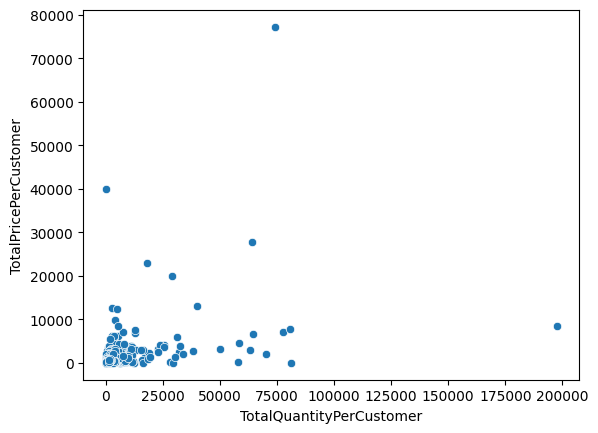

In [ ]:
#scatter plot
from seaborn import scatterplot
scatterplot(y=df_grouped ['TotalPricePerCustomer'], x=df_grouped ['TotalQuantityPerCustomer'])
plt.xlabel('TotalQuantityPerCustomer')
plt.ylabel('TotalPricePerCustomer')
plt.show()

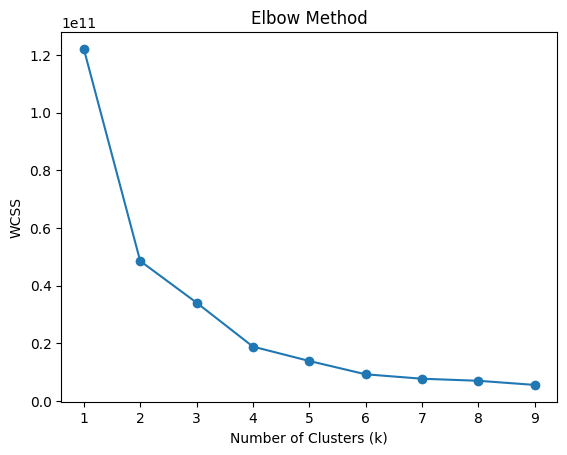

In [ ]:
#Finding the appropriate number of clusters

#I am calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster
x = df_grouped[["TotalPricePerCustomer", "TotalQuantityPerCustomer"]]
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

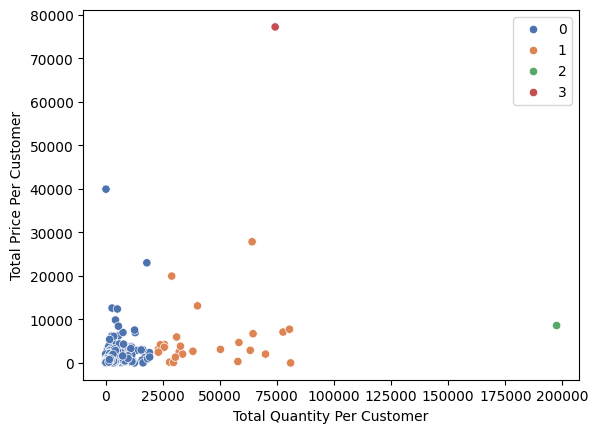

In [ ]:
#Create a KMeans to cluster the data into 4 groups
kmeans = KMeans(n_clusters = 4)

#Fit the KMeans model to the data 'x'

clust = kmeans.fit(x)
cl = kmeans.labels_

#Create a scatterplot
scatterplot(x=df_grouped["TotalQuantityPerCustomer"],y=df_grouped["TotalPricePerCustomer"], hue=cl, palette="deep")
plt.xlabel('Total Quantity Per Customer')
plt.ylabel('Total Price Per Customer')
plt.show()

In [ ]:
#I am curious to see the impact of the outliers on the dataset so I will exclude them
# only keeping the ones which the quantity less than 20,000

df_grouped_excluding_outliers = df_grouped[df_grouped['TotalQuantityPerCustomer'] < 20000]
#df_grouped_excluding_outliers.describe()

new_df_grouped_excluding_outliers = df_grouped_excluding_outliers[df_grouped_excluding_outliers['TotalPricePerCustomer'] < 35000]
new_df_grouped_excluding_outliers.describe()


,CustomerID,TotalPricePerCustomer,TotalQuantityPerCustomer
count,4311.000000,4311.000000,4311.000000
mean,15299.861285,462.955394,880.418696
std,1721.180484,706.009913,1522.556055
min,12347.000000,0.000000,1.000000
25%,13813.500000,178.405000,160.000000
50%,15299.000000,311.640000,376.000000
75%,16778.500000,510.570000,968.500000
max,18287.000000,22998.400000,19256.000000


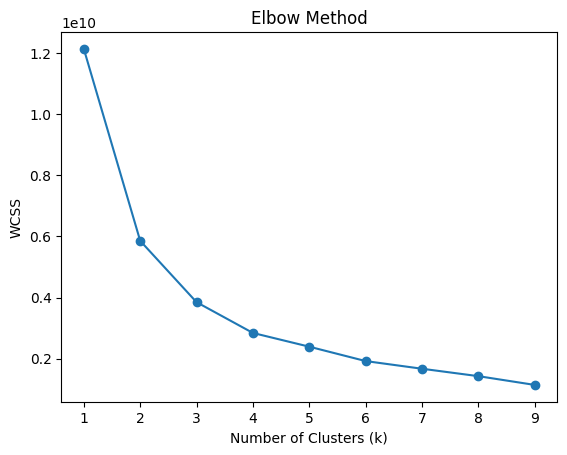

In [ ]:
#elbow method
y = new_df_grouped_excluding_outliers[["TotalPricePerCustomer", "TotalQuantityPerCustomer"]]
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(y)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

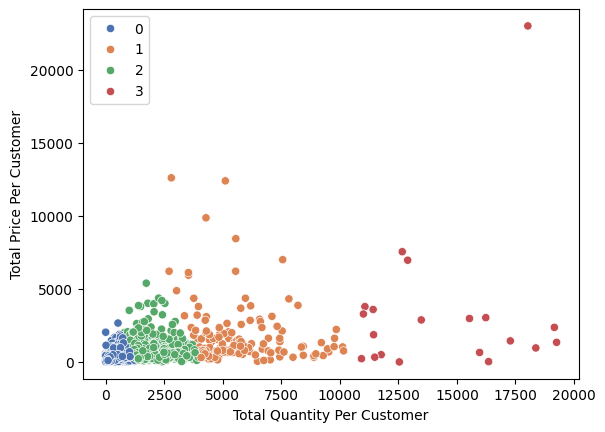

In [ ]:
#Create a KMeans to cluster the data into 5 groups
kmeans = KMeans(n_clusters = 4)

#Fit the KMeans model to the data 'y'

clust = kmeans.fit(y)
cl = kmeans.labels_

#Create a scatterplot
scatterplot(x=new_df_grouped_excluding_outliers["TotalQuantityPerCustomer"],y=new_df_grouped_excluding_outliers["TotalPricePerCustomer"], hue=cl, palette="deep")
plt.xlabel('Total Quantity Per Customer')
plt.ylabel('Total Price Per Customer')
plt.show()

In [ ]:
#I am curious to see the impact of the outliers on the dataset so I will exclude them
# only keeping the ones which the quantity less than 14,000

new_dataframe = new_df_grouped_excluding_outliers[new_df_grouped_excluding_outliers['TotalPricePerCustomer'] < 14000]

new_dataframe.describe()

,CustomerID,TotalPricePerCustomer,TotalQuantityPerCustomer
count,4310.000000,4310.000000,4310.000000
mean,15299.757077,457.726752,876.440139
std,1721.366590,616.993699,1500.153534
min,12347.000000,0.000000,1.000000
25%,13813.250000,178.402500,160.000000
50%,15298.500000,311.620000,375.500000
75%,16778.750000,510.082500,966.500000
max,18287.000000,12601.830000,19256.000000


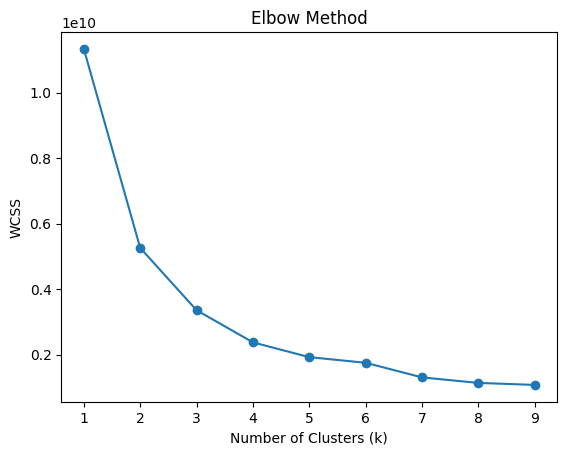

In [ ]:
#elbow method
z = new_dataframe[["TotalPricePerCustomer", "TotalQuantityPerCustomer"]]
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(z)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

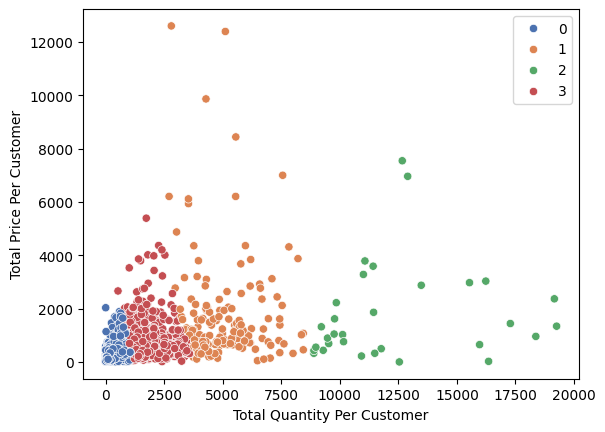

In [ ]:
kmeans = KMeans(n_clusters = 4)

#Fit the KMeans model to the data 'z'

clust = kmeans.fit(z)
cl = kmeans.labels_

#Create a scatterplot
scatterplot(x=new_dataframe["TotalQuantityPerCustomer"],y=new_dataframe["TotalPricePerCustomer"], hue=cl, palette="deep")
plt.xlabel('Total Quantity Per Customer')
plt.ylabel('Total Price Per Customer')
plt.show()

In [ ]:
#I am curious to see the impact of the outliers on the dataset so I will exclude them
# only keeping the ones which the quantity less than 14,000

new_dataframe_less_outliers = new_dataframe[new_dataframe['TotalPricePerCustomer'] < 7000]

new_dataframe_less_outliers.describe()

,CustomerID,TotalPricePerCustomer,TotalQuantityPerCustomer
count,4304.000000,4304.000000,4304.000000
mean,15300.276487,444.925331,868.838290
std,1720.822953,506.635596,1482.582463
min,12347.000000,0.000000,1.000000
25%,13813.750000,178.250000,159.000000
50%,15298.500000,311.390000,374.500000
75%,16779.250000,508.852500,963.000000
max,18287.000000,6961.780000,19256.000000


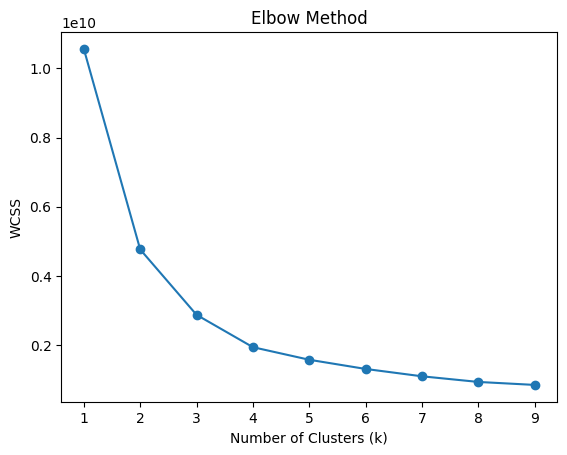

In [ ]:
#elbow method
w = new_dataframe_less_outliers[["TotalPricePerCustomer", "TotalQuantityPerCustomer"]]
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(w)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

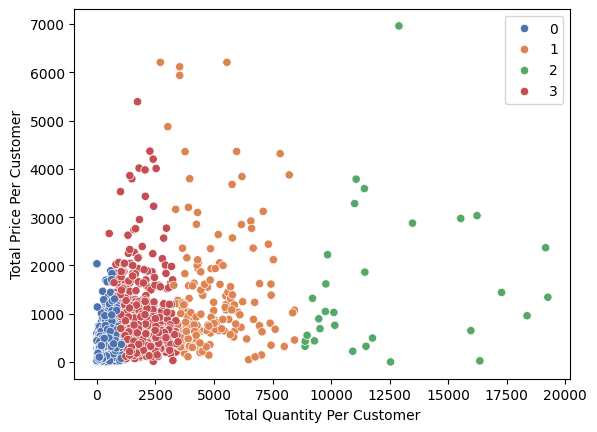

In [ ]:
kmeans = KMeans(n_clusters = 4)

#Fit the KMeans model to the data 'w'

clust = kmeans.fit(w)
cl = kmeans.labels_

#Create a scatterplot
scatterplot(x=new_dataframe_less_outliers["TotalQuantityPerCustomer"],y=new_dataframe_less_outliers["TotalPricePerCustomer"], hue=cl, palette="deep")
plt.xlabel('Total Quantity Per Customer')
plt.ylabel('Total Price Per Customer')
plt.show()

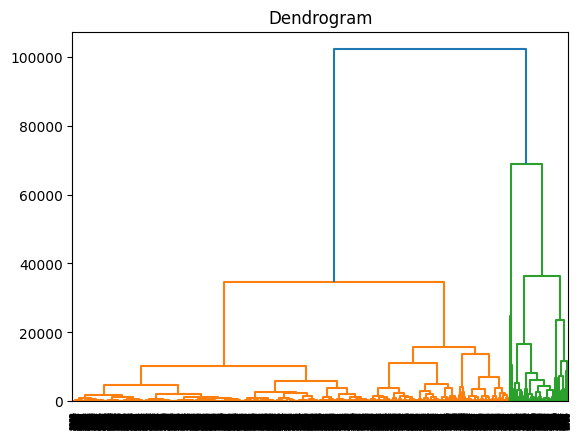

In [ ]:
#creating a dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_data = linkage(new_dataframe_less_outliers[['TotalQuantityPerCustomer', 'TotalPricePerCustomer']], method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.title('Dendrogram')
plt.show()

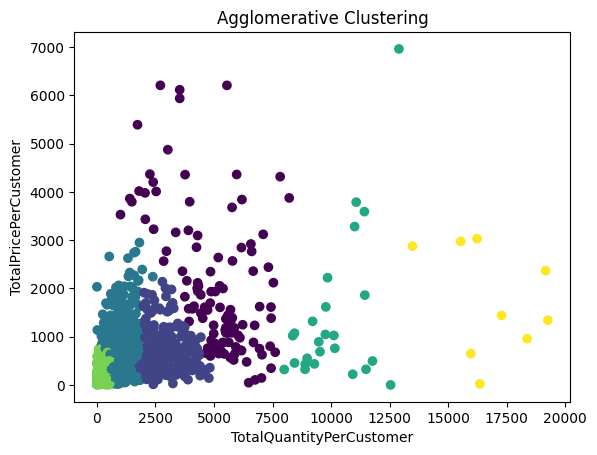

In [ ]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(new_dataframe_less_outliers[['TotalQuantityPerCustomer', 'TotalPricePerCustomer']])

plt.scatter(new_dataframe_less_outliers['TotalQuantityPerCustomer'], new_dataframe_less_outliers['TotalPricePerCustomer'], c=labels)
plt.xlabel('TotalQuantityPerCustomer')
plt.ylabel('TotalPricePerCustomer')
plt.title('Agglomerative Clustering')
plt.show()